## Statistics for Machine Learning - Part 2

Topics to be covered in this segment :
1. Skewness and Kurtosis
2. Sampling distributions 
    - Uniform
    - Normal  
    - Log normal  
    - Exponential  
    - Binomial

In [1]:
# import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Skewness and Kurtosis

<h3>Skewness</h3>   

- Skewness is a statistical measure that assesses the asymmetry of a probability distribution. 
- It helps quantify the extent to which the distribution of data deviates from symmetry, or in other words, how much the data is skewed or shifted to one side.  

**Positive Skewness**: A distribution is positively skewed if it has a long right tail. This means that the majority of the data points are concentrated on the left side of the distribution, and there are few extreme values on the right side. The tail points towards the positive direction of the number line.

**Negative Skewness**: A distribution is negatively skewed if it has a long left tail. This means that the majority of the data points are concentrated on the right side of the distribution, and there are few extreme values on the left side. The tail points towards the negative direction of the number line.

**Zero Skewness**: A distribution is symmetric if it has zero skewness. This implies that the distribution is balanced and has equal amounts of data on both sides of the mean, with the tails mirroring each other.

<h3>Kurtosis</h3>   

- Kurtosis is a statistical measure that quantifies the degree of peakedness or flatness of a probability distribution.
- It provides information about the tails and peakedness of the distribution compared to a normal distribution.
-  It assesses the tails of the distribution, indicating whether the data has heavy tails (leptokurtic) or light tails (platykurtic) compared to a normal distribution.

**Kurtosis > 3**: The distribution is leptokurtic, meaning it has heavy tails and a sharp peak compared to a normal distribution. It indicates that the distribution has more extreme values than a normal distribution.

**Kurtosis < 3**: The distribution is platykurtic, meaning it has lighter tails and a flatter peak compared to a normal distribution. It indicates that the distribution has fewer extreme values than a normal distribution.

**Kurtosis = 3**: The distribution is mesokurtic, meaning it has the same kurtosis as a normal distribution. It indicates that the distribution has similar tail behavior and peak shape as a normal distribution.

### Sampling Distributions 

#### 1. Uniform distribution
- Uniform distribution refers to a type of probability distribution where all possible outcomes are equally likely.
- The bounds are defined by two parameters: minimum value (a) and maximum value (b).
- The distribution is often abbreviated as **U[a, b]**, where **U** stands for uniform distribution.

*HistPlot or Histogram will represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.*


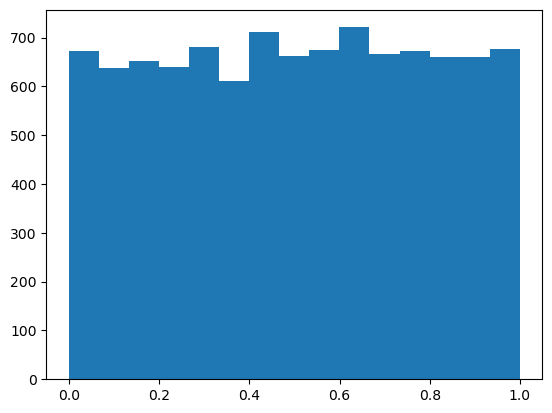

In [2]:
# np.random.uniform(size = n) will generate n values from a uniform distribution.
 
u = np.random.uniform(size=10000)
plt.hist(u, bins = 15)
plt.show()

#### 2. Gaussian (Normal) distribution 

- A Normal Distribution or Gaussian Distribution is a type of Continous probability distribution for a random variable.
- The mean (average), median (midpoint), and mode (most frequent observation) of the Normally distributed data are all equal to one another.         
- Where all three values represent the peak or the highest value of the distribution. And the distribution then falls symmetrically around the mean, the width of which is defined by the standard deviation.  
- Below given the formula of the Normal distribution.
<center><img src="images/Normal_distribution.png" width="400" height="120" align="center"/></center>

- *f* probability density function
- *${\displaystyle \sigma}$* standard deviation of distribution
- *${\displaystyle \mu}$* mean of distribution


The data in a normal distribution is represented by a bell-shaped curve that encompasses various percentiles.
<center><img src="images/Normal_distribution_percentile.png" width="600" height="300" align="center"/></center>  

- For all normal distributions, 68.2% of the observations will appear within **1 standard deviation** from the mean.
- 95.4% of the observations will fall within **2 standard deviations** from the mean, and 99.7% of the observations will fall within **3 standard deviations** from the mean. 
- These rules will define a heuristic that describes where most of the data in a normal distribution will appear.

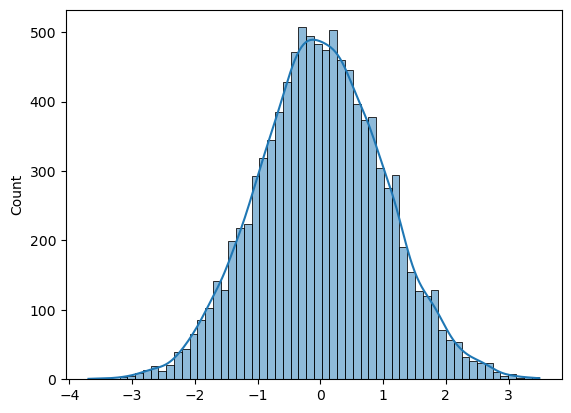

In [3]:
# np.random.normal(n) will generate data of n values which is normally distributed 
x = np.random.normal(size=10000)

# sns.histplot() is the function in seaborn visualization library that does the same thing as plt.hist()
# Here the normally distributed data is bring divided into bins and plotted which will eventually represent bell-shaped curve.
# 'kde' argument, kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s)
sns.histplot(x, kde = True)
plt.show()

### Central limit Theorem
- The Central limit theorem is the basis for how normal disrtibution works.
- The central limit theorem says that the sampling distribution of the mean will always be normally distributed, as long as the sample size is large enough, even if the source population is not normally distributed.
- Under certain conditions, the distribution of the sample mean (from multiple random samples) approaches a standard normal distribution (a bell-shaped curve).
- We dont need to know from which distribution does the samples came from while solving some problems, We can use the means normal distribution to make confidence intervals, do various tests for finding difference between samples.
- It is said that in order for the Central limit theorem to be true, th sample size must be atleast 30.  


**Law of Large Numbers**: As you collect more and more samples (or increase the sample size), the sample mean will converge to the population mean.
**Sampling Distribution of the Mean**: Imagine taking multiple random samples from a population. Calculate the mean for each sample. The sampling distribution of the mean is the distribution of these sample means.


In [4]:
x = np.random.normal(size=10000) # exaple of normally distributed data

x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([ 0.40687708, -0.29336707,  0.08216562,  0.41398365, -1.62767602,
       -1.45637819,  0.76222973, -0.16546368,  1.65011324, -0.33668328])

In [5]:
# The mean of a sample isn't always going to be close to zero with such a small sample:
np.mean(x_sample)

-0.056419889900973984

#### 3. Log Normal Distribution
- The log-normal distribution is a continuous probability distribution of a random variable whose logarithm is normally distributed.
- If the natural logarithm of a random variable X follows a normal distribution, then X follows a log-normal distribution.
- Defined on strictly **x > 0**, and the distribution is right skewed. 

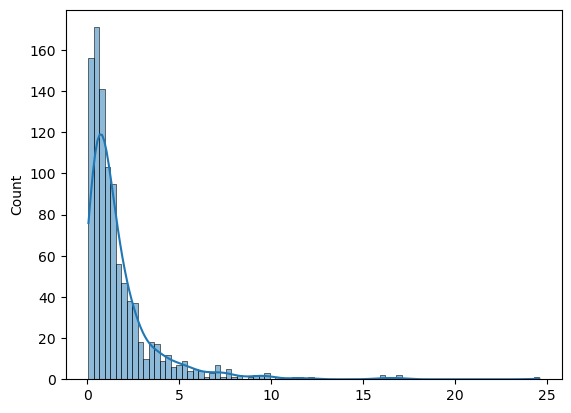

In [6]:
x = np.random.lognormal(size = 1000)

sns.histplot(x, kde = True)
plt.show()

#### 4. Exponential Distribution
- The exponential distribution is a continuous probability distribution that describes the time between events in a Poisson process.
- It is defined only on **X >= 0**
- The exponential distribution has a single parameter, usually denoted by λ (lambda), which is the rate parameter. 
- It describes the rate at which events occur, and its reciprocal (1/λ) is the mean time between events.
- Exponential Distribution has limitations. The assumption of a constant rate (memorylessness) may not be realistic for all processes. In many real-world scenarios, the rate of occurrence of events may change over time.



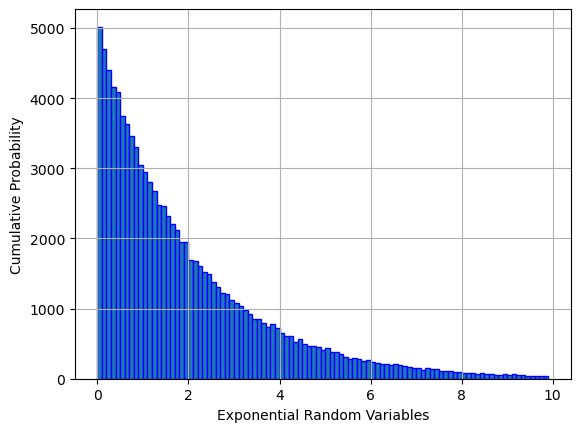

In [12]:
# Rate parameter
lam = 0.5

# Generate values from exponential distribution
# The scale parameter β = 1/λ.
y = np.random.exponential(size = 100000, scale = 1/lam)

bin = np.arange(0,10,0.1)

plt.hist(y, bins=bin, edgecolor='blue') 
plt.xlabel('Exponential Random Variables')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()


This is how exponential distribution actually looks like.

#### 5. Binomial Distribution
- All distributions so far have been for continuous variables (PDFs). This one is discrete (PMF).
- We've already been using it for coin flips; it's used for binary (0 or 1) outcome.  
- Describes the number of successes in a fixed number of independent Bernoulli trials, where each trial has a constant probability of success, denoted by p.

**parameters are**:  
**n**: number of trials  
**p**: probability of outcome of 1  
**size**: number of experiments with n trials each  

**Un weighted coin with p = 0.5**

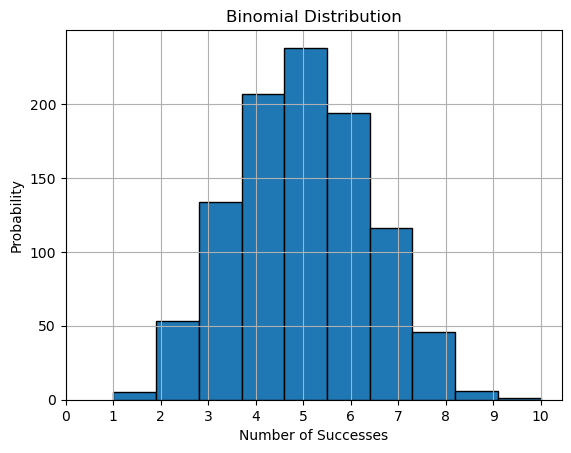

In [47]:
np.random.seed(42)
# Parameters
n = 10  # Number of trials
p = 0.5  # Probability of success

# Generate binomial random variables
num_samples = 1000
binomial_samples = np.random.binomial(n, p, num_samples)

# Plot histogram
plt.hist(binomial_samples,  edgecolor = 'black')
plt.title('Binomial Distribution')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.xticks(np.arange(n+1))
plt.grid(True)
plt.show()


**Weighted Coin with p = 0.8**

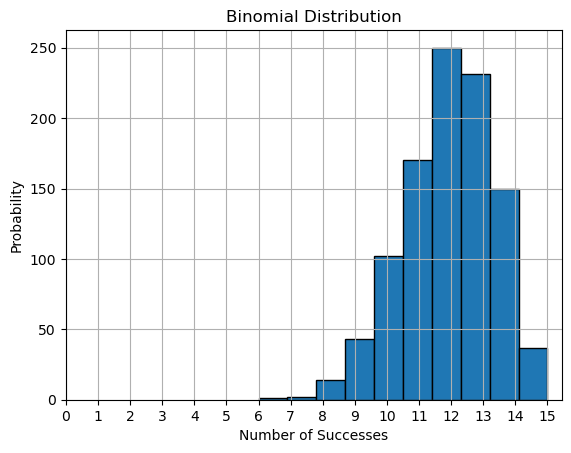

In [45]:
np.random.seed(42)
# Parameters
n = 15  # Number of trials
p = 0.8  # Probability of success

# Generate binomial random variables
num_samples = 1000
binomial_samples = np.random.binomial(n, p, num_samples)

# Plot histogram
plt.hist(binomial_samples,  edgecolor = 'black')
plt.title('Binomial Distribution')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.xticks(np.arange(n+1))
plt.grid(True)
plt.show()


### Conclusion
In addition to the sampling distributions discussed, such as the normal, exponential, binomial, and log-normal distributions, there are several other important probability distributions frequently used in statistics and data analysis. Some of these distributions include the chi-square distribution, Poisson distribution, uniform distribution, gamma distribution, and beta distribution, among others.

- **Chi-Square Distribution**: The chi-square distribution is commonly used in hypothesis testing and to model the sum of squared standard normal random variables.

- **Poisson Distribution**: The Poisson distribution models the number of events occurring in a fixed interval of time or space, given a known average rate of occurrence.

- **Uniform Distribution**: The uniform distribution represents a constant probability over a specified interval, with all outcomes equally likely.

- **Gamma Distribution**: The gamma distribution is a versatile distribution that generalizes the exponential distribution and includes various shapes depending on its parameters.

- **Beta Distribution**: The beta distribution is often used as a prior distribution in Bayesian statistics and to model proportions or probabilities.

Understanding these distributions and their properties is essential for various statistical analyses, including hypothesis testing, parameter estimation.

Additional topics in Statistics are Hypothesis testing -> allows us to make inferences about population parameters based on sample data and evaluate the strength of evidence for or against certain hypotheses. We will explore different types of hypothesis tests, such as t-tests, chi-square tests, ANOVA, and more, and learn how to apply them in practice to draw meaningful conclusions from data. Stay tuned for more insights into statistical analysis!